# Multiclass classification using a neural network

Adapted from [Kaggle](https://www.kaggle.com/code/asamad06/multiclass-classification-using-neural-network/notebook)

**Import required packages**

In [327]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import random
import time

from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.backend import clear_session

from tensorflow.random import set_seed
set_seed(42)

In [298]:
plt.style.use('ggplot')

**Load data and take a look at their features and values**

In [299]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Column 'Id' can be dropped**

In [300]:
df.drop(['Id'], axis=1, inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**For the prediction model, prepare the data in a feedable format. Shuffle data to provide variability in train and test data**

In [301]:
# Shuffle data
df = shuffle(df, random_state=42)

In [302]:
# Define feature and target variable
X = df.drop(['Species'], axis = 1)
y = df['Species']

<font color='blue'>**Since we are performing multiclass classification, we need to encode the target labels and transform them in a categorical form.**<font>

In [303]:
encode = LabelEncoder()
y = encode.fit_transform(y)
print(y.shape)
y[:5]

(150,)


array([1, 0, 2, 1, 1])

In [304]:
y = to_categorical(y)
print(y.shape)
y[:5]

(150, 3)


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

**Split the data into train and test set**

**Build a neural network using keras, with the number of features as the input dimension. Use 'relu' as the activation function for all layers except the output layer, where activation function softmax is used.**

**For multiclass classification, 'categorical crossentropy' has been applied for loss calculation and 'adam' for optimization.**

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((105, 4), (105, 3), (45, 4), (45, 3))

In [306]:
y_test[:5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [325]:
# Define model
clear_session()

dim = len(df.columns)-1

model = Sequential()
model.add(Dense(8, input_dim = dim, activation = 'relu')) # Note! It's input_dim NOT input_shape=(4,)
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
# model.add(Dense(10, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [326]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 10)                90        
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 3)                 33        
                                                                 
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [309]:
%%time

# Fit model
history = model.fit(X_train, y_train, validation_split=0.25, epochs=100, batch_size=10, verbose=0)

Wall time: 5.39 s


In [310]:
# List data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [311]:
def learning_curve(history):
    """
    Function to plot training and validation loss and accuracy
    """
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
        
    ax[0].plot(history.history["loss"], color="r", label="Training Loss")
    ax[0].plot(history.history["val_loss"], color="b", label="Validation Loss")
    ax[0].legend(loc="upper right")
    ax[0].set_xlabel("Epoch", fontsize=14)
    ax[0].set_ylabel("Loss", fontsize=14)
    ax[0].set_ylim([0, max(history.history["loss"])+1])
    ax[0].set_title("Training and Validation Loss", fontsize=16)
    
    ax[1].plot(history.history["accuracy"], color="r", label="Training Loss")
    ax[1].plot(history.history["val_accuracy"], color="b", label="Validation Loss")
    ax[1].legend(loc="best")
    ax[1].set_xlabel("Epoch", fontsize=14)
    ax[1].set_ylabel("Accuracy", fontsize=14)
    ax[1].set_ylim([0, max(history.history["accuracy"])+0.05])
    ax[1].set_title("Training and Validation Accuracy", fontsize=16);    

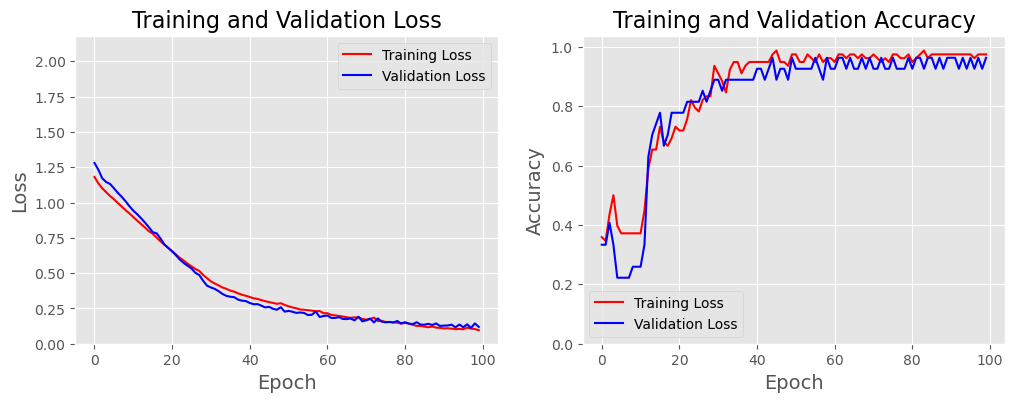

In [312]:
learning_curve(history)

In [313]:
# Evaluate model with test data
scores = model.evaluate(X_test, y_test, verbose = 0)
print(f'Test loss: {scores[0]:.4f}') 
print(f'Test accuracy: {scores[1]:.4f}')

Test loss: 0.0449
Test accuracy: 0.9778


In [314]:
# Alternatively
for i, m in enumerate(model.metrics_names):
    print(f"{m}: {scores[i]:.4f}")

loss: 0.0449
accuracy: 0.9778


**Model prediction on test data**

In [315]:
test_size = 5

# Use model.predict() to extract class probabilities
pred_prob = model.predict(X_test[:test_size]) 
pred_prob

1/1 [==============================] - 0s 55ms/step


array([[4.3640102e-06, 2.6875123e-02, 9.7312051e-01],
       [2.1702012e-03, 9.0565085e-01, 9.2178904e-02],
       [5.6662127e-02, 9.3924630e-01, 4.0916139e-03],
       [9.9869978e-01, 1.3002012e-03, 3.1097073e-08],
       [8.2370440e-07, 1.3095655e-02, 9.8690355e-01]], dtype=float32)

In [316]:
# Select class with the highest probability
pred = np.argmax(pred_prob, axis=1) # Returns indices of the maximum values along an axis
pred

array([2, 1, 1, 0, 2], dtype=int64)

In [317]:
# Inverse label encoding
pred_ = encode.inverse_transform(pred)
pred_

array(['Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica'], dtype=object)

In [318]:
# Prediction in a single line of code
pred_ = encode.inverse_transform(np.argmax(model.predict(X_test[:test_size]), axis=1))
pred_

1/1 [==============================] - 0s 21ms/step


array(['Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica'], dtype=object)

In [319]:
# Retrieve true values from y_test
true_y = encode.inverse_transform(np.argmax(to_categorical(y_test[:test_size]), axis = 1)[:,1])
true_y

array(['Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica'], dtype=object)

In [320]:
# Compare prediction and true values
for i,j in zip(pred_, true_y):
    print("Predicted: {}, True: {}".format(i, j))

Predicted: Iris-virginica, True: Iris-virginica
Predicted: Iris-versicolor, True: Iris-versicolor
Predicted: Iris-versicolor, True: Iris-versicolor
Predicted: Iris-setosa, True: Iris-setosa
Predicted: Iris-virginica, True: Iris-virginica


**Investigating code snippets**

In [321]:
y_test[:test_size]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [322]:
to_categorical(y_test[:test_size])

array([[[1., 0.],
        [1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.],
        [1., 0.]],

       [[1., 0.],
        [0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.],
        [1., 0.]],

       [[1., 0.],
        [1., 0.],
        [0., 1.]]], dtype=float32)

In [323]:
np.argmax(to_categorical(y_test[:test_size]), axis = 1)

array([[0, 2],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 2]], dtype=int64)

In [324]:
np.argmax(to_categorical(y_test[:test_size]), axis = 1)[:,1]

array([2, 1, 1, 0, 2], dtype=int64)